In [515]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import scipy as sp
import matplotlib.pyplot as plt

In [516]:
# os.chdir("/Users/luca339/Desktop/datathon_2021")

In [517]:
case = pd.read_csv("covid_cases_race.csv").sort_values('Location')
case.head()

,Location,Race Categories Include Hispanic Individuals,White % of Cases,White % of Total Population,Black % of Cases,Black % of Total Population,Hispanic % of Cases,Hispanic % of Total Population,Asian % of Cases,Asian % of Total Population,American Indian or Alaska Native % of Cases,American Indian or Alaska Native % of Total Population,Native Hawaiian or Other Pacific Islander % of Cases,Native Hawaiian or Other Pacific Islander % of Total Population,Other % of Cases,Other % of Total Population,% of Cases with Known Race,% of Cases with Unknown Race,% of Cases with Known Ethnicity,% of Cases with Missing Ethnicity
7,Alabama,Yes,0.56,0.68,0.29,0.27,0.07,0.04,<.01,0.01,NR,<.01,NR,<.01,0.14,0.03,0.57,0.43,0.35,0.65
10,Alaska,Yes,0.38,0.65,0.03,0.02,0.1,0.07,0.05,0.06,0.26,0.15,0.03,0.02,0.25,0.10,0.81,0.19,0.56,0.44
39,Arizona,NaN,0.45,0.54,0.04,0.04,0.36,0.32,0.02,0.03,0.06,0.04,NR,<.01,0.07,0.02,0.81,0.19,0.81,0.19
50,Arkansas,Yes,0.73,0.77,0.18,0.15,0.11,0.08,0.01,0.02,<.01,<.01,0.01,<.01,0.06,0.05,0.88,0.12,1.00,0
34,California,NaN,0.2,0.36,0.04,0.05,0.55,0.40,0.07,0.15,<.01,<.01,<.01,<.01,0.13,0.03,0.77,0.23,0.77,0.23


In [518]:
vax = pd.read_csv("covid_vax_race.csv").sort_values("Location")

# if "White % of Vaccinations" is not "NR", set to 1, else 0
vax['include_race'] = vax["White % of Vaccinations"].apply(lambda val: val != "NR").astype(int)
case['include_race'] = vax["White % of Vaccinations"].apply(lambda val: val != "NR").astype(int)
vax.head()

,Location,Race Categories Include Hispanic Individuals,White % of Vaccinations,Black % of Vaccinations,Hispanic % of Vaccinations,Asian % of Vaccinations,American Indian or Alaska Native % of Vaccinations,Native Hawaiian or Other Pacific Islander % of Vaccinations,Other % of Vaccinations,% of Vaccinations with Known Race,% of Vaccinations with Unknown Race,% of Vaccinations with Known Ethnicity,% of Vaccinations with Unknown Ethnicity,include_race
14,Alabama,Yes,0.8,0.17,0.02,0.02,<.01,<.01,0.01,0.68,0.32,0.11,0.89,1
33,Alaska,Yes,0.3,0.01,0.03,0.03,0.36,<.01,0.3,0.71,0.29,0.72,0.28,1
20,Arizona,NaN,0.76,0.02,0.13,0.04,0.05,<.01,NR,0.63,0.37,0.63,0.37,1
34,Arkansas,NaN,NR,NR,NR,NR,NR,NR,NR,NR,NR,NR,NR,0
32,California,NaN,0.36,0.03,0.18,0.14,<.01,<.01,0.28,0.91,0.09,0.91,0.09,1


Strip vax csv to only consider cases that include race in vaccination data, convert that to a python list

In [519]:
vax_stripped = vax.loc[vax['White % of Vaccinations'] != "NR"]
vax_stripped.head()
include_race_list = vax_stripped['Location'].tolist()

In [520]:
print(include_race_list) # list of US states that include race in vaccination data

['Alabama', 'Alaska', 'Arizona', 'California', 'Colorado', 'Delaware', 'Florida', 'Illinois', 'Indiana', 'Iowa', 'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Mississippi', 'Missouri', 'Nebraska', 'New Jersey', 'New York', 'North Carolina', 'Ohio', 'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin']


In [521]:
def pearsonr_pval(x,y):
    return sp.stats.pearsonr(x,y)[1]

In [522]:
case['include_race'] = vax["White % of Vaccinations"].apply(lambda val: val != "NR").astype(int)

In [523]:
# case.corr(method=pearsonr_pval)
case.head()

,Location,Race Categories Include Hispanic Individuals,White % of Cases,White % of Total Population,Black % of Cases,Black % of Total Population,Hispanic % of Cases,Hispanic % of Total Population,Asian % of Cases,Asian % of Total Population,...,American Indian or Alaska Native % of Total Population,Native Hawaiian or Other Pacific Islander % of Cases,Native Hawaiian or Other Pacific Islander % of Total Population,Other % of Cases,Other % of Total Population,% of Cases with Known Race,% of Cases with Unknown Race,% of Cases with Known Ethnicity,% of Cases with Missing Ethnicity,include_race
7,Alabama,Yes,0.56,0.68,0.29,0.27,0.07,0.04,<.01,0.01,...,<.01,NR,<.01,0.14,0.03,0.57,0.43,0.35,0.65,1
10,Alaska,Yes,0.38,0.65,0.03,0.02,0.1,0.07,0.05,0.06,...,0.15,0.03,0.02,0.25,0.10,0.81,0.19,0.56,0.44,1
39,Arizona,NaN,0.45,0.54,0.04,0.04,0.36,0.32,0.02,0.03,...,0.04,NR,<.01,0.07,0.02,0.81,0.19,0.81,0.19,0
50,Arkansas,Yes,0.73,0.77,0.18,0.15,0.11,0.08,0.01,0.02,...,<.01,0.01,<.01,0.06,0.05,0.88,0.12,1.00,0,0
34,California,NaN,0.2,0.36,0.04,0.05,0.55,0.40,0.07,0.15,...,<.01,<.01,<.01,0.13,0.03,0.77,0.23,0.77,0.23,0


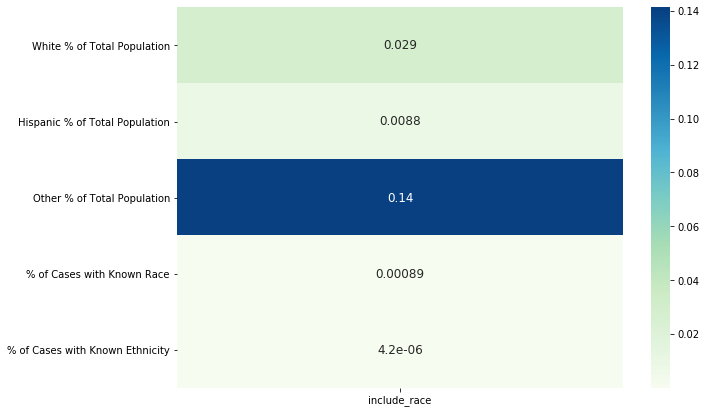

In [524]:
df_corr_impact_action_yn = case[case.columns[:]].corr(pearsonr_pval)['include_race'][:-1]
#set fig size
fig, ax = plt.subplots(figsize=(10,7))
#plot matrix
sns.heatmap(df_corr_impact_action_yn.to_frame(),annot=True, annot_kws={'size':12},cmap="GnBu")
plt.show();

In [525]:
# CRDT = pd.read_csv("CRDT_DATA.csv").sort_values(by=['State', 'Date'], ascending=[True, False])
CRDT.head()

,Date,State,Cases_Total,Cases_White,Cases_Black,Cases_Latinx,Cases_Asian,Cases_AIAN,Cases_NHPI,Cases_Multiracial,...,Tests_Latinx,Tests_Asian,Tests_AIAN,Tests_NHPI,Tests_Multiracial,Tests_Other,Tests_Unknown,Tests_Ethnicity_Hispanic,Tests_Ethnicity_NonHispanic,Tests_Ethnicity_Unknown
0,20210217,AK,56977.0,17572.0,1460.0,NaN,2314.0,11922.0,1474.0,4347.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56,20210214,AK,56410.0,17430.0,1452.0,NaN,2249.0,11837.0,1467.0,4323.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
112,20210210,AK,56097.0,17353.0,1444.0,NaN,2235.0,11767.0,1457.0,4298.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
168,20210207,AK,55259.0,17183.0,1430.0,NaN,2195.0,11627.0,1444.0,4215.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
224,20210203,AK,54820.0,17073.0,1408.0,NaN,2165.0,11512.0,1440.0,4187.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [526]:
states = ["AL", "AK", "AZ", "AR", "CA", "CO", "CT", "DE", "FL", "GA", 
          "HI", "ID", "IL", "IN", "IA", "KS", "KY", "LA", "ME", "MD", 
          "MA", "MI", "MN", "MS", "MO", "MT", "NE", "NV", "NH", "NJ", 
          "NM", "NY", "NC", "ND", "OH", "OK", "OR", "PA", "RI", "SC", 
          "SD", "TN", "TX", "UT", "VT", "VA", "WA", "WV", "WI", "WY"]

us_state_abbrev = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'American Samoa': 'AS',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'District of Columbia': 'DC',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Guam': 'GU',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Northern Mariana Islands':'MP',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Puerto Rico': 'PR',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virgin Islands': 'VI',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY'
}

rs = pd.read_csv("state_population_race.csv").drop(0).drop(9).drop(52).replace({"Location": us_state_abbrev}).sort_values(by='Location')
# rs = rs
rs.index = range(len(rs.index))
# rs = rs[rs.Location != "District of Columbia" and rs.Location != "Puerto Rico" and rs.Location != "United States"]

print(len(rs['Location']))

# print(rs)

50


In [527]:
case_data = pd.read_csv("CRDT_DATA.csv").sort_values(by=['Date', 'State'], ascending=[False, True])
case_data = case_data[case_data.State.isin(states)]
case_data.index = range(len(case_data.index))
case_data.head(50)

,Date,State,Cases_Total,Cases_White,Cases_Black,Cases_Latinx,Cases_Asian,Cases_AIAN,Cases_NHPI,Cases_Multiracial,...,Tests_Latinx,Tests_Asian,Tests_AIAN,Tests_NHPI,Tests_Multiracial,Tests_Other,Tests_Unknown,Tests_Ethnicity_Hispanic,Tests_Ethnicity_NonHispanic,Tests_Ethnicity_Unknown
0,20210217,AK,56977.0,17572.0,1460.0,NaN,2314.0,11922.0,1474.0,4347.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,20210217,AL,483167.0,154388.0,79834.0,NaN,2172.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,20210217,AR,314192.0,201093.0,49574.0,NaN,2800.0,1012.0,3330.0,1780.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,20210217,AZ,801055.0,294886.0,24528.0,235631.0,11412.0,38773.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,20210217,CA,3416147.0,524753.0,106400.0,1446427.0,177919.0,8561.0,14897.0,38784.0,...,10148280.0,3638062.0,95738.0,215411.0,95738.0,5890886.0,16535491.0,10148280.0,19701161.0,16535491.0
5,20210217,CO,416174.0,170548.0,12027.0,115030.0,6076.0,2455.0,1207.0,6118.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,20210217,CT,271356.0,79692.0,18626.0,39978.0,2778.0,383.0,NaN,15873.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,20210217,DE,83581.0,39955.0,18878.0,13889.0,1735.0,NaN,NaN,NaN,...,52599.0,15321.0,NaN,NaN,NaN,56776.0,73798.0,52599.0,484806.0,73798.0
8,20210217,FL,1844627.0,623935.0,224912.0,572623.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,20210217,GA,796547.0,302026.0,205064.0,82262.0,16741.0,469.0,713.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [577]:
import math

def get_race_data(race1, race2):    
    case_perc1 = [(case_data['Cases_' + race1][i]) / (case_data['Cases_Total'][i]) for i in range(0, 50)]
    case_perc2 = [(case_data['Cases_' + race2][i]) / (case_data['Cases_Total'][i]) for i in range(0, 50)]
    
#     pop_perc1 = rs[race1].astype('float')
    
    race1_burden = case_perc1 / rs[race1].astype('float')
    
    race2_burden = case_perc2 / rs[race2].astype('float')
    
    
    lst = [(case_data['State'][i], (race2_burden[i] / race1_burden[i])) for i in range(50)]
#     print()
#     print(case_perc1[9], case_perc2[9], race1_burden[9], race2_burden[9], lst[9])
    return lst

    # lol sorry for the disgusting list comprehension below
#     lst = [(case_data['State'][i], (case_data['Cases_' + race1][i]) / (case_data['Cases_Total'][i])) for i in range(0, 56) if top_level['State'][i] in states]
#     print(lst)
#     lst = [(lst[i][0], (lst[i][1].astype('float') / (1 - rs[race2][i].astype('float')))) for i in range(50)]
#     return lst
    
lst = get_race_data("White", "Black")
# print([float(lst[i][1]) <= 1 for i in range(len(lst))])
for i in range(50):
    if float(lst[i][1]) <= 1:
        print(lst[i][0])
print(lst)

IN
KS
NC
NE
OK
TN
[('AK', 2.2660016969145125), ('AL', 1.2761632172996142), ('AR', 1.1693612172634449), ('AZ', 1.0484284900637204), ('CA', 1.3925545348217558), ('CO', 1.2582205596078524), ('CT', 1.5355722029814787), ('DE', 1.3307507643346472), ('FL', 1.2736728451948787), ('GA', 1.127987013537903), ('HI', 2.7209700427960057), ('IA', 1.1120795380268313), ('ID', 1.1835517578369708), ('IL', 1.0676118927826486), ('IN', 0.8422622313190328), ('KS', 0.943310596098569), ('KY', 1.0545606592549248), ('LA', 1.157333009024911), ('MA', 1.6377838913523532), ('MD', 1.3959937857680789), ('ME', 4.303276361124414), ('MI', 1.1046658010161223), ('MN', 1.4847641370648308), ('MO', 1.1931849588816656), ('MS', 1.051689546518299), ('MT', 1.0375756584328482), ('NC', 0.9943897141573699), ('ND', 1.8279527136771783), ('NE', 0.8065811615568897), ('NH', 1.8496534802634408), ('NJ', 1.1483844631940718), ('NM', 1.6041907599427645), ('NV', 1.0817962875456275), ('NY', nan), ('OH', 1.1419793495850596), ('OK', 0.889219888342

In [529]:
data = get_race_data("White", "Black")

cast_df = pd.DataFrame.from_records(data, columns =['State', 'race1_case_percentage'])


cast_df.head()

,State,race1_case_percentage
0,AK,2.266002
1,AL,1.276163
2,AR,1.169361
3,AZ,1.048428
4,CA,1.392555


In [560]:
def show_race_data(race1, race2, download):
    fig = go.Figure(data=go.Choropleth(
        locations=cast_df['State'], # Spatial coordinates
        z = cast_df['race1_case_percentage'].astype(float), # Data to be color-coded
        locationmode = 'USA-states', # set of locations match entries in `locations`
        colorscale=[[0, 'rgba(6,54,21, 0.85)'],   
               [0.04, 'rgba(255, 255, 255, 0.85)'],  
               [1, 'rgba(214, 39, 40, 0.85)']]
    ))

    fig.update_layout(
        title_text = 'COVID-19 Health Disparities Visualized',
        geo_scope='usa', # limite map scope to USA
    )

    fig.show()
    
#     if download:
#         import plotly.io as pio
#         pio.write_image(fig, '/Users/luca339/Desktop/datathon_2021/fig.png')

In [561]:
show_race_data("White", "Black", True)